link [Tableau](https://public.tableau.com/app/profile/gentur.sulistiyo.h/viz/AnalisaPS2/Dashboard1?publish=yes)


Gentur Herlambang ,Data Science Online Batch 17  

# Background

Sekarang video games telah menjadi bagian hidup bagi sebagaian orang , tetapi sejarah video games sangat panjang dan salah satu bagian sejarah itu ialah console PS2. Disini saya ingin menjelaskan alasan-alasan mengapa ps2 merupakan salah satu consol terbaik yang  ada.

Frame work yang akan saya gunakan untuk mengekplorasi ialah dengan 5W+1H , dimana pertanyan-pertanyaan nya ialaha:  
Why : Menghapa memilih ps2?  
What : Game apa yang paling populer di ps2 ?  
Who : Siapa Penerbit game terbaik untuk ps2?  
When : Kapan titik kejayaan ps2?  
Where : Dimana pasar Terpenting ps2?  
How : Bagaimana tanggapan pengguna dan kritik dengan penjualan ps2?

# Data Loading

In [18]:
import pandas as pd ##import library yang di butuhkan
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


Sumber data yang saya gunakan berasal dari [Kaggle](https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings?datasetId=576&searchQuery=score) mengenai penjaualan game dan skor user dan kritik dari berbagai macam Console berdasaran beberapa region

In [1]:
df=pd.read_csv(r'K:\Hack8 Data Science\Phase 0\Milestone\Video_Games_Sales_as_at_22_Dec_2016.csv') ## Menlaod data

NameError: name 'pd' is not defined

# Data Cleaning

Pada proces data cleaning saya akan menjabarkan langkah dalam memeprsiapkan data sebelum di olah

Pertama Mengcopy dataframe sehingga data asli masih utuh

In [20]:
games=df.copy()## copy dataframe

Kemudian melakukan pengecekan terhadap data

In [21]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


Di sini terlihat ada beberapa angka yang kosong ( null) dan beberapa type data masih belum ideal 

In [22]:
games.dropna(inplace=True) ## data cleaning dengan menghilangkan angka data yang tidak lengkap dan mngubah type data
games['User_Score'] = games.User_Score.astype('float')
games['Year_of_Release'] = games.Year_of_Release.astype('int64')
games['User_Count'] = games.User_Count.astype('int64')
games['Critic_Count'] = games.Critic_Count.astype('int64')

Melakukan pengecekan terhadap data yang dimiliki

In [23]:
games.head (10) ## cek 10 data pertama

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51,8.0,322,Nintendo,E
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73,8.3,709,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73,8.0,192,Nintendo,E
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65,8.5,431,Nintendo,E
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41,6.6,129,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80,8.4,594,Nintendo,E
11,Mario Kart DS,DS,2005,Racing,Nintendo,9.71,7.47,4.13,1.90,23.21,91.0,64,8.6,464,Nintendo,E
13,Wii Fit,Wii,2007,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70,80.0,63,7.7,146,Nintendo,E
14,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,61.0,45,6.3,106,Good Science Studio,E
15,Wii Fit Plus,Wii,2009,Sports,Nintendo,9.01,8.49,2.53,1.77,21.79,80.0,33,7.4,52,Nintendo,E


Terlihat di sini bentuk penjabaran data , yang unik dari data ini ialah cara penyajian penjual tiap region di taruh di bagian colom bukan 

# Analisis dan Explorasi data

Pada bagaian ini saya akan mnganalisa dan menjawab pertanyaan framework saya yang berbentuk 5W + 1H

## WHY

Disini saya akan menjelaskan mngapa saya mengatakan bahwa ps2 merupakan salah satu console terbaik yang ada dengan cara menghitung total penjualan game di dunia berdasrkan masing masing jenis console. 


<AxesSubplot: ylabel='Platform'>

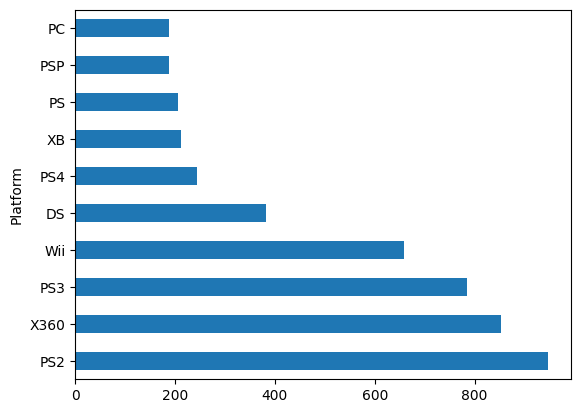

In [40]:
Best_console = games.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10).plot(kind='barh') ## menghitung total penjual game di dunia
Best_console


Terlihat bahwa total penjual game ps2 terbanyak sebanyak 950 juta games yang di jual selama masa hidupnya , ini mengalahkan rival terdekatnya yaitu XBOX 360 yang berkisar sekitar 850 juta

## What

Setelah menentukan jenis platform, sekarang kita akan mengekplorasi judul game apa yang paling banyak di beli

Pertama kita check ada berapa judul game untuk ps2

In [38]:
ps2= games[games['Platform'] == 'PS2'] ## melihat jumlah judul game yang ada di console ps2
ps2.shape

(1140, 16)

Ternaya di data terdapat 1140 judul game untuk console ps2

Kemudian kita akan mencari mana jumlah penjualan game terbanyak untuk console ps2

<AxesSubplot: ylabel='Name'>

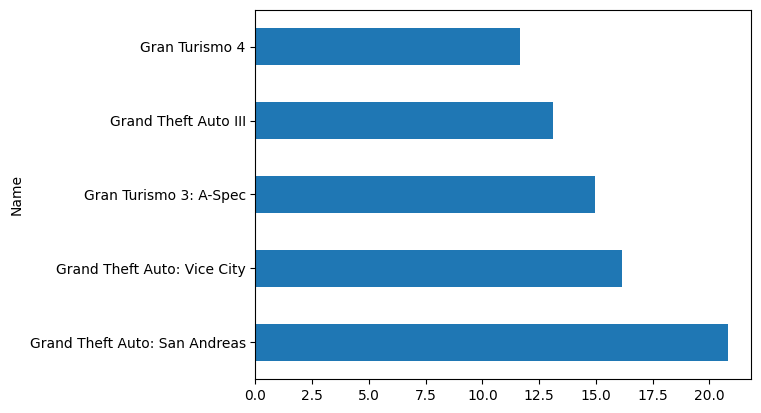

In [42]:
ps2_game = ps2.groupby('Name')['Global_Sales'].sum().sort_values(ascending=False).head(5).plot(kind='barh') ## Melihat Jumlah penjualan  judul game terbanyak untuk console ps2
ps2_game

GTA san andreas memiliki jumlah penjualan terbanyak yaitu sebesar 21 juta copy , ini mengalahkan game- game lainya yang tidak bisa tembus 20 juta copy

## Who

Kemudian kita akan mencari tahu siapa penerbit game yang terbaik untuk ps2

untuk menentukan penerbit game terbaik , akan di dasarkan banyak nya jumlah copy game yang di jual untuk ps2

<AxesSubplot: ylabel='Publisher'>

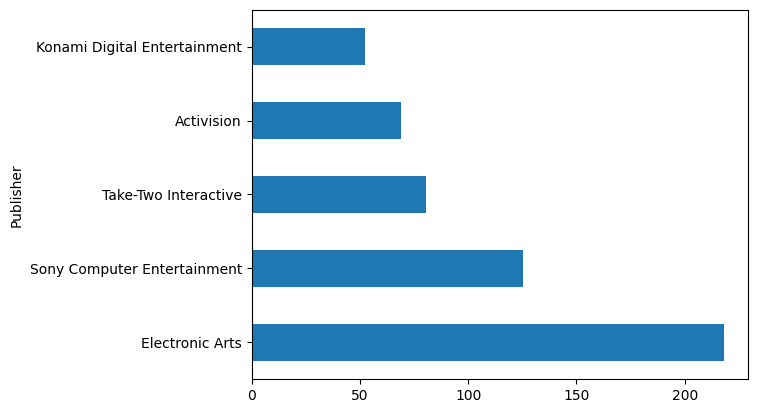

In [43]:
ps2_publisher = ps2.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(5).plot(kind='barh') ## menetukan jumlah copygame yang terjual berdasarkan penerbit
ps2_publisher

Ternyata EA lah penerbit terbaik untuk ps2 bahkan mangalahkan Rockstar Game yang game nya menduduki peringkat atas total penjualan game, EA sendiri menyumbang kurang lebih 25% dari total penjualan game ps2 

## When

Kali ini kta akan melihat kapan puncak penjualan games untuk ps2

Untuk melihat puncak penjualan games ps2 , saya akan membandingkan jumlah penjualan pertahunya

<AxesSubplot: xlabel='Year_of_Release'>

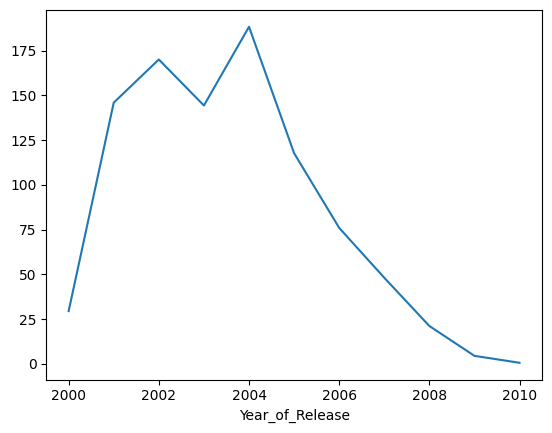

In [30]:
ps2_year = ps2.groupby('Year_of_Release')['Global_Sales'].sum().plot(kind='line') ## melihat jumlah penjualan ps2 dari tahun ke tahun
ps2_year

Tereliahat bahwa puncak pejualan game ps2 dari tahun 2002-2005 kemudian turun secara perlahan hingga akhir nya berhenti di 2010

## Where

Disini kita akan mecari tahu region mana yang paling berpengaruh terhadap penjual global game ps2

Pertama kita persiapkan data

In [31]:
Score = ['Critic_Score','Critic_Count','User_Score','User_Count','Developer','Rating','Year_of_Release'] ## data preperation
games_bersih = ps2.drop(labels=Score, axis=1)
games_bersih.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1140 entries, 17 to 16595
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          1140 non-null   object 
 1   Platform      1140 non-null   object 
 2   Genre         1140 non-null   object 
 3   Publisher     1140 non-null   object 
 4   NA_Sales      1140 non-null   float64
 5   EU_Sales      1140 non-null   float64
 6   JP_Sales      1140 non-null   float64
 7   Other_Sales   1140 non-null   float64
 8   Global_Sales  1140 non-null   float64
dtypes: float64(5), object(4)
memory usage: 89.1+ KB


Kemudian kita melakukan korelasi antara masing region dengan penjualan global

In [32]:
corr_m=games_bersih.corr() ## korelasi region dengan global sales
corr_m.head(5)

C:\Users\parma\AppData\Local\Temp\ipykernel_20968\167055397.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_m=games_bersih.corr()


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
NA_Sales,1.000000,0.655312,0.261896,0.575840,0.927333
EU_Sales,0.655312,1.000000,0.283266,0.265005,0.766519
JP_Sales,0.261896,0.283266,1.000000,0.213619,0.452873
Other_Sales,0.575840,0.265005,0.213619,1.000000,0.716126
Global_Sales,0.927333,0.766519,0.452873,0.716126,1.000000


Agar lebih mudah kita akan memasukan hasil korelasi ke dalam peta heatmap

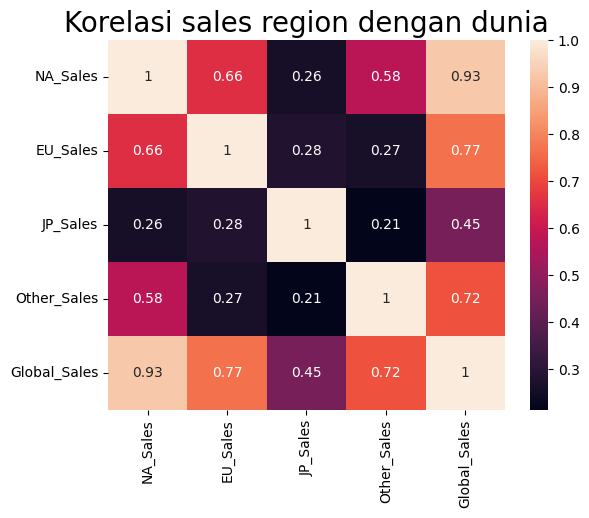

In [33]:
fig,ax = plt.subplots() ## memasukan hasil ke korelasi ke dalam heatmap agar lebih mudah di mengerti
sns.heatmap(corr_m, annot=True, ax = ax)
ax.set_title('Korelasi sales region dengan dunia', fontsize=20)
plt.show()

Terlihat Region yang paling berpengaruh untuk penjualan global ialah region amerika dengan tingkat korelasi sebsar 0.93 , berarti jumlah penjualan game ps2 di dunia sanagat di pengaruhi oleh jumalah penjualan ps2 di amerka(corr value >0.8). maka dari itu pasar utama ps2 adalah amerika

## How

Pada bagaian ini kita akan meliahat bagaimana reaksi kritikus dan pengguna terhadap game dan penjualan game ps2

Pertama kita lihat bagaimana kritikus melihat game ps2

C:\Users\parma\AppData\Local\Temp\ipykernel_17432\343498352.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ps2.Critic_Score)


Critic_Score
median: 71.0
mean: 69.4921052631579
mode: 73.0
skew: -0.4506066293180253


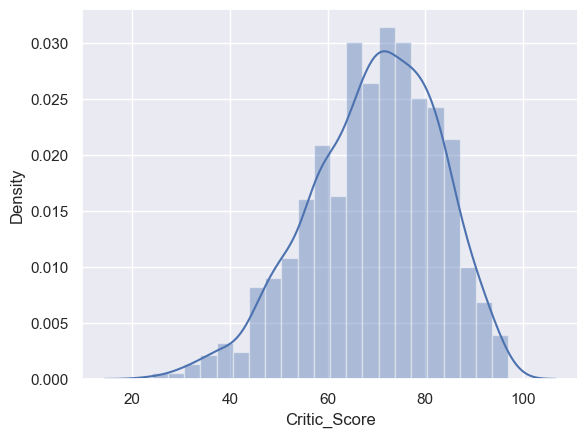

In [ ]:
sns.distplot(ps2.Critic_Score) ## Melihat central tendencies dari score kritikus
print("Critic_Score")
print ("median:",ps2['Critic_Score'].median())
print ("mean:",ps2 ['Critic_Score'].mean())
print ("mode:",ps2 ['Critic_Score'].mode()[0])
print ("skew:",ps2 ['Critic_Score'].skew())

Dilihat dari central tendenciesnya rata-rata kritikus konsinten meberikan penilaian sekitar 70 untuk game ps2

Kemudian kita melihat bagaimana user menialai game ps2

C:\Users\parma\AppData\Local\Temp\ipykernel_17432\4201383157.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ps2.User_Score)


User_Score
median: 8.0
mean: 7.66438596491228
mode: 8.5
skew: -1.5282134905854703


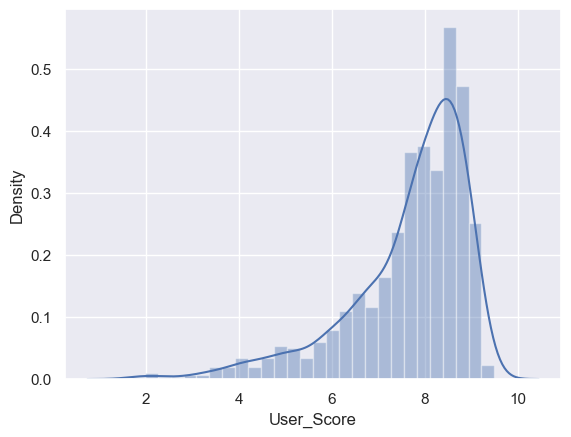

In [ ]:
sns.distplot(ps2.User_Score)## Melihat central tendencies dari score user
print("User_Score")
print ("median:",ps2['User_Score'].median())
print ("mean:",ps2 ['User_Score'].mean())
print ("mode:",ps2 ['User_Score'].mode()[0])
print ("skew:",ps2 ['User_Score'].skew())

Terlihat perbendaan score yang user berikan , di sini meskipun rata-rata skor nya 7.6 tetapi paling banyak skor 8.5 ini dapat terjadi karena lebih banyak user yang meberikan niali skor rendah di banding dengan degan niali skor kritikus.

Dapat di simpulkan bahwa skor user lebih beragam dibadning dengan skor dari kritikus.

Selanjutnya kita akan melihat hungan anatara jumlah penjualan global dengan nilai skor dari kritikus. untuk mengetes teori hipotesis ini saya akan menggunakan  
h0: penjaulan global= skor yang kritikus berikan  
h1: penjualan global X skor yang kritikus berikan  

jenis tes yang di lakukan ialah "Two Samples Independent Two Tailed Hypothesis Testing"

In [ ]:
stats.ttest_ind(ps2['Critic_Score'],ps2['Global_Sales']) ## Two Samples Independent Two Tailed Hypothesis Testing skor kritik dengan global sale


Ttest_indResult(statistic=175.18782353191517, pvalue=0.0)

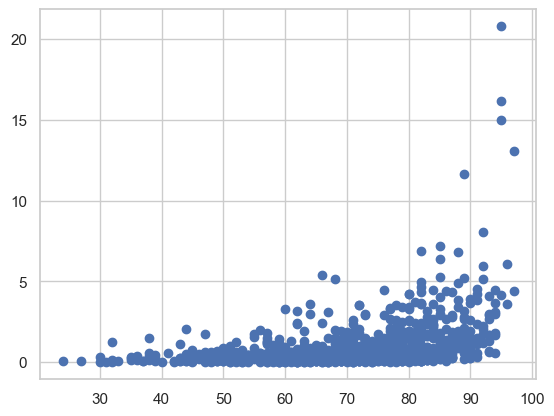

In [ ]:
sns.set_style('whitegrid')
plt.scatter('Critic_Score','Global_Sales',data=ps2)
plt.show()

Hasil dari tes yang kita lakukan mendapatkan p value kurang dari  0.05 maka kita  menolak null hipotesis (h0) yang berarti penjualan global tidak ada hubunuganya dengan skor kritikus.

Selanjutnya kita akan melihat hungan anatara jumlah penjualan global dengan nilai skor dari user. untuk mengetes teori hipotesis ini saya akan menggunakan  
h0: penjaulan global= skor yang user berikan  
h1: penjualan global X skor yang user berikan  

jenis tes yang di lakukan ialah "Two Samples Independent Two Tailed Hypothesis Testing"

In [ ]:
stats.ttest_ind(ps2['User_Score'],ps2['Global_Sales'],equal_var=True)## Two Samples Independent Two Tailed Hypothesis Testing skor user dengan global sale

Ttest_indResult(statistic=119.41699761294228, pvalue=0.0)

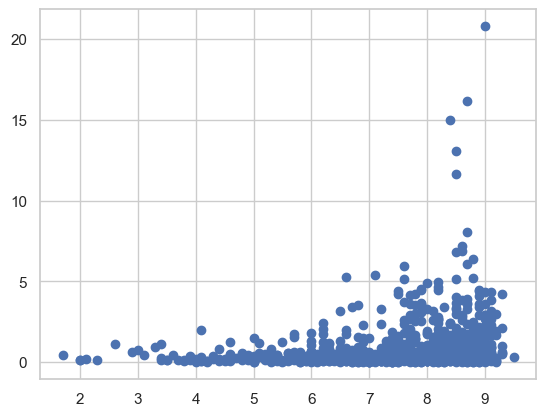

In [ ]:
sns.set_style('whitegrid')
plt.scatter('User_Score','Global_Sales',data=ps2)
plt.show()

Hasil dari tes yang kita lakukan mendapatkan p value yang kurang dari 0.05 maka kita  menolak null hipotesis (h0) yang berarti penjualan global tidak ada hubunuganya dengan skor user.

Setelah melihat bahwa kedua nilai skor user dan kritik tidak ada hubungnya dengan penjualan global, saya mau melihat apakah ada korelasi anatara ketiganya , untuk itu saya menggunakan heatmap untuk melihat korelasi nya.

In [ ]:
def heatmap_plot(data):  ## Memebuat heatmap antara korelasi user skor, kritik skor , dan gloabal sale

    plt.figure(figsize=(15,5))
    plt.title('Heatmap Correlation and Impact Distribution of Critics and Users')
    sns.heatmap(data[['Global_Sales', 'Critic_Score', 'User_Score']].corr(), 
                annot=True, cmap='mako', fmt='.3f'
    )

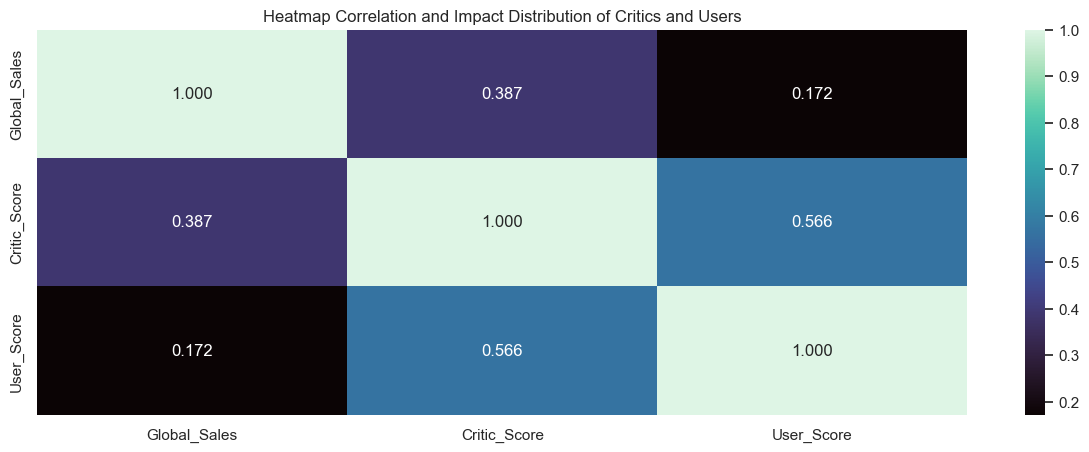

In [ ]:
heatmap_plot(ps2)

Dapat dilihat bahwa ketiganya tidak memiliki korelasi yang significant , jadi dapat dikatakan bahwa baik skor user maupun kritik tidak berpengaruh terhadap penjualan game ps2

# Konklusi

Dengan angka penjualan game sebanyak 950 juta di selruruh dunia , game yang penjualnya sampai di atas 20 juta, kerjasama dengan penerbit besar dunia seprti EA , fokus penjualan pada pasr amerka, dan puncak masa jaya pada tahun 2002-2005  hingga akirnya berhenti pada tahun 2010, Meskipun begitu jumlah penjualan yang tidak berpengaruh kepada skor user maupaun kritik tetap membuat nya ps2 sebagai salah satu konsole terbaik yang  ada.